Text(0.5, 0.93, 'In-Fa Typhoon- 12 hr accumulated rainfall')

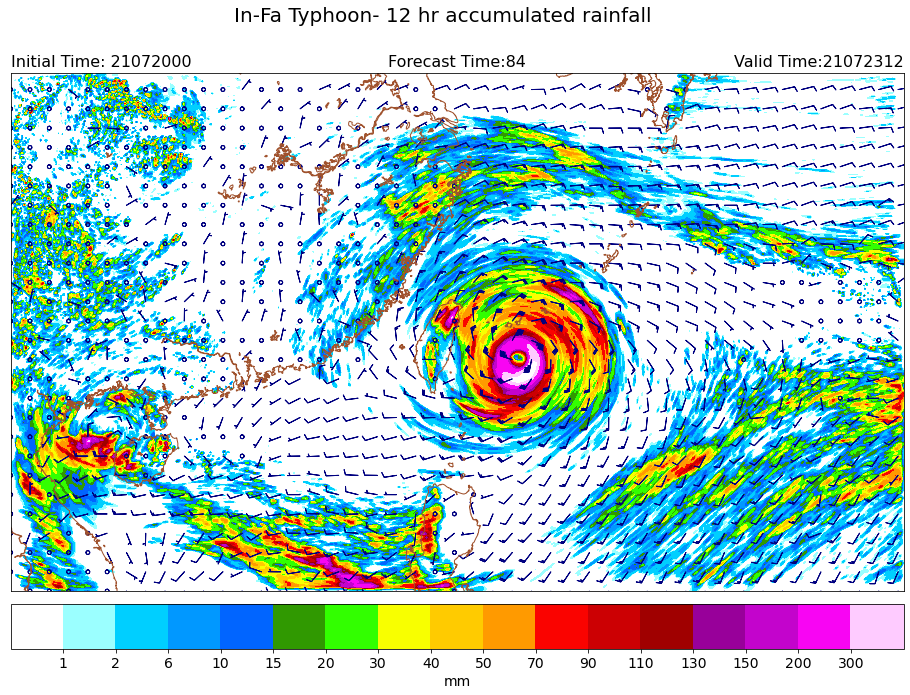

In [1]:
import numpy as np
import pygrib as pb
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cwbplot.cwb_colorbar as cwbcbar

tau_72 = pb.open("M-A0064-21072000-072.grb2")
tau_84 = pb.open("M-A0064-21072000-084.grb2")

basicvar_72 = tau_72.select()[:]
basicvar_84 = tau_84.select()[:]
lon_0, lat_0 = basicvar_84[0]["LoVInDegrees"], basicvar_84[0]["LaDInDegrees"]
lat_1, lat_2 = basicvar_84[0]["Latin1InDegrees"], basicvar_84[0]["Latin2InDegrees"]
lats, lons = basicvar_84[0].latlons()
proj = Basemap(projection="lcc",resolution='h',lat_0 = lat_0 ,lon_0 = lon_0 ,lat_1 = lat_1, \
           lat_2 = lat_2, llcrnrlat = lats[0,0], llcrnrlon = lons[0,0], urcrnrlat = lats[-1,-1], \
           urcrnrlon = lons[-1,-1])

analDate = basicvar_84[0].analDate.strftime("%y%m%d%H")
fcst = str(basicvar_84[0].forecastTime)
valDate = basicvar_84[0].validDate.strftime("%y%m%d%H")
acc12rain = basicvar_84[61]["values"] - basicvar_72[61]["values"]
u10m = basicvar_84[66]["values"]
v10m = basicvar_84[67]["values"]

fig = plt.figure(figsize=(16,12))
raincbar = cwbcbar.rain(style="NPD")
proj.drawcoastlines(linewidth=1, color='sienna')
ctf = proj.contourf(lons, lats, acc12rain, **raincbar, latlon=True)
gap = 25
proj.barbs(lons[::gap,::gap], lats[::gap,::gap], u10m[::gap,::gap], v10m[::gap,::gap] ,\
            length=5,barbcolor="navy", latlon=True)
cbar = plt.colorbar(ctf,orientation='horizontal',pad=0.02,ticks=raincbar["levels"][1:-1])
cbar.ax.tick_params(labelsize=14)
cbar.set_label("mm",size=14)
plt.title("Initial Time: {}".format(analDate), loc="left",fontsize=16)
plt.title("Forecast Time:{}".format(fcst),loc="center",fontsize=16)
plt.title("Valid Time:{}".format(valDate),loc="right",fontsize=16)
plt.suptitle("In-Fa Typhoon- 12 hr accumulated rainfall",y=0.93,fontsize=20)